In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import itertools
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import math
from datetime import datetime
# plt.style.use('bmh')
import itertools
import warnings
plt.style.use('fivethirtyeight')



In [23]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [24]:
df = pd.read_csv("./Steel-historic-data2011-2021.csv",parse_dates=['date'],dayfirst=True,index_col='date').dropna()


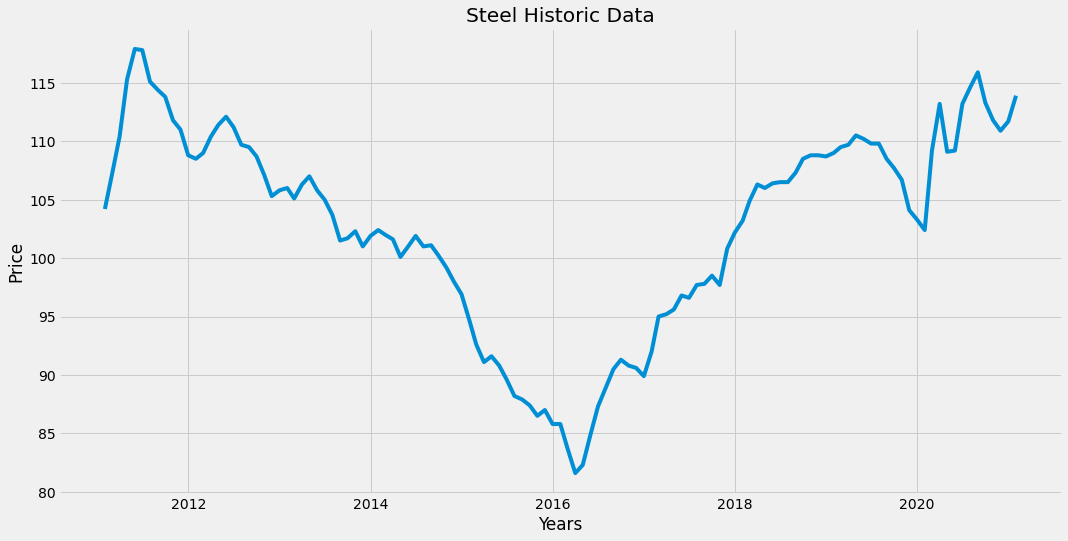

In [25]:
plt.figure(figsize=(16,8))
plt.title('Steel Historic Data')
plt.xlabel('Years')
plt.ylabel('Price')
plt.plot(df.value)
plt.show()

In [26]:
start_date = datetime(2011,1,1)
end_date = datetime(2021,3,3)
copper =df[start_date:end_date]

<ipython-input-27-689e2b453ad8>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(copper, model='additive', freq=12)
<ipython-input-27-689e2b453ad8>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

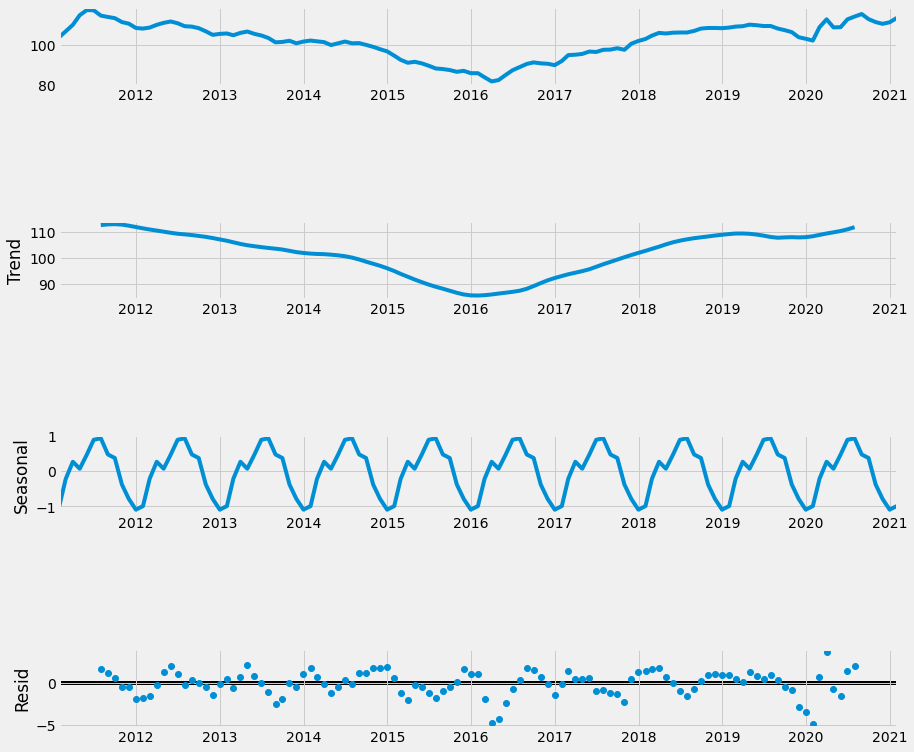

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(copper, model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
fig.show()

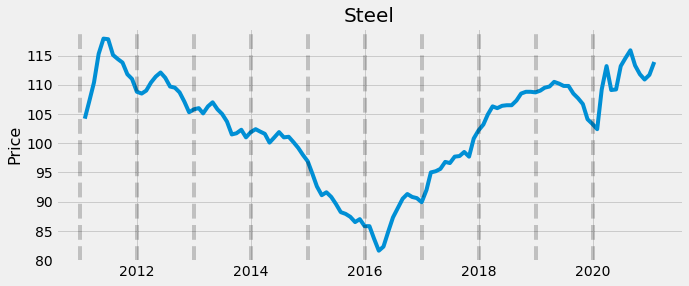

In [28]:
plt.figure(figsize=(10,4))
plt.plot(copper)
plt.title('Steel', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [29]:
first_diff = copper.diff()[1:]

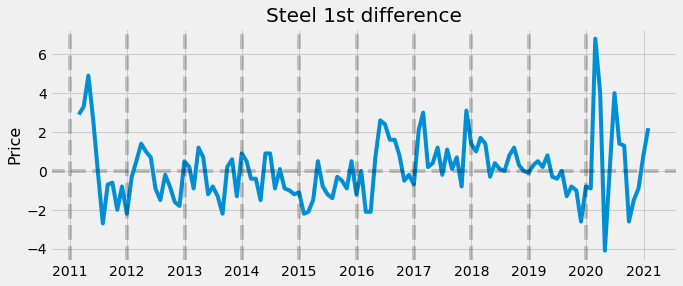

In [30]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Steel 1st difference', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 20 artists>

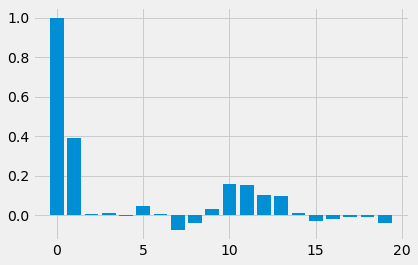

In [31]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 15 artists>

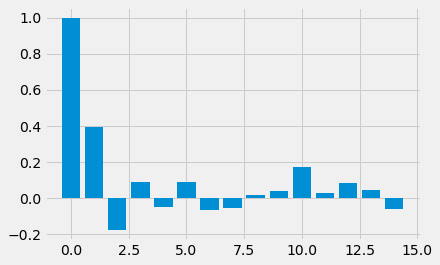

In [32]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [33]:
train_end = datetime(2020,1,1)
test_end = datetime(2021,3,3)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [34]:
print(test_data)
print(train_data)

            value
date             
2020-01-31  102.4
2020-02-29  109.2
2020-03-31  113.2
2020-04-30  109.1
2020-05-31  109.2
2020-06-30  113.2
2020-07-31  114.6
2020-08-31  115.9
2020-09-30  113.3
2020-10-31  111.8
2020-11-30  110.9
2020-12-31  111.7
2021-01-31  113.9
            value
date             
2011-01-31  104.2
2011-02-28  107.1
2011-03-31  110.4
2011-04-30  115.3
2011-05-31  117.9
...           ...
2019-08-31  108.5
2019-09-30  107.7
2019-10-31  106.7
2019-11-30  104.1
2019-12-31  103.3

[108 rows x 1 columns]


In [38]:
my_order = (2,2,1)
my_seasonal_order = (1,2, 3, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [39]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 5.115910053253174


In [40]:
model_fit.mse

226.8734067247002

In [41]:
print(model_fit.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                      value   No. Observations:                  108
Model:             SARIMAX(2, 2, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                -164.961
Date:                                    Sun, 21 Mar 2021   AIC                            345.923
Time:                                            14:08:31   BIC                            365.177
Sample:                                        01-31-2011   HQIC                           353.653
                                             - 12-31-2019                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3388      0.180      1.881      0

In [42]:

#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data['value'] - predictions[0]

In [43]:
print(test_data.head())
print(predictions.head())
print(residuals.head())

            value
date             
2020-01-31  102.4
2020-02-29  109.2
2020-03-31  113.2
2020-04-30  109.1
2020-05-31  109.2
date
2020-01-31    102.828841
2020-02-29    102.182739
2020-03-31    100.926684
2020-04-30     99.390841
2020-05-31     98.145382
dtype: float64
date
2020-01-31    -0.428841
2020-02-29     6.371159
2020-03-31    10.371159
2020-04-30     6.271159
2020-05-31     6.371159
Name: value, dtype: float64


Text(0, 0.5, 'Error')

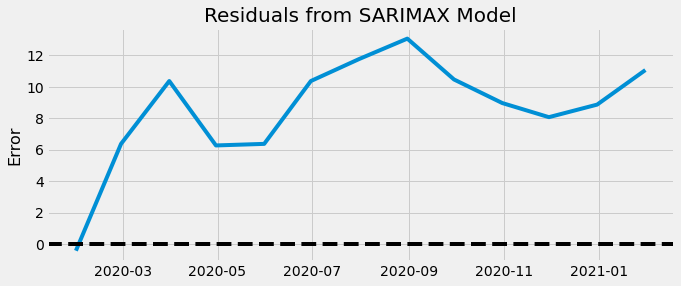

In [44]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMAX Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [45]:
RMSE_training=math.sqrt(model_fit.mse)

In [46]:
RMSE_training
# len(test_data)

15.062317442037271

In [47]:
train_end = datetime(2021,3,3)
train_data = df[:train_end]
my_order = (2,2,0)
my_seasonal_order = (1,2, 3, 36)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 7.201129913330078


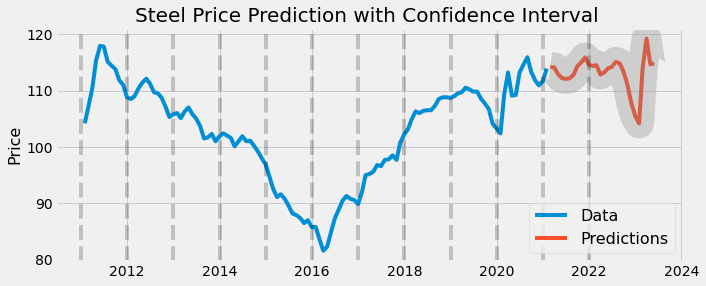

In [53]:
predictions = model_fit.forecast(28)
predictions = pd.Series(predictions)
fig=plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions, linewidth="4", label ="Predictions")


plt.legend(('Data', 'Predictions'), fontsize=16)
plt.plot(predictions, linewidth="30", color="Grey", alpha=0.3)


plt.title('Steel Price Prediction with Confidence Interval ', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
fig.savefig("Steel Price Prediciton with Confidence Interval",dpi=120)

In [49]:
predictions

2021-02-28    114.183349
2021-03-31    114.102745
2021-04-30    112.891748
2021-05-31    112.189734
2021-06-30    112.064542
2021-07-31    112.154711
2021-08-31    112.790086
2021-09-30    114.300497
2021-10-31    115.002581
2021-11-30    115.868302
2021-12-31    114.559975
2022-01-31    114.360954
2022-02-28    114.496301
2022-03-31    112.850556
2022-04-30    113.213951
2022-05-31    113.939437
2022-06-30    114.205567
2022-07-31    115.087760
2022-08-31    114.812830
2022-09-30    113.385044
2022-10-31    111.023503
2022-11-30    107.843482
2022-12-31    105.486274
2023-01-31    104.166100
2023-02-28    113.964069
2023-03-31    119.200439
2023-04-30    114.646008
2023-05-31    114.817124
2023-06-30    119.751757
2023-07-31    123.088643
2023-08-31    125.200942
2023-09-30    123.091516
2023-10-31    122.067411
2023-11-30    123.112456
2023-12-31    125.830140
2024-01-31    130.430536
Freq: M, dtype: float64

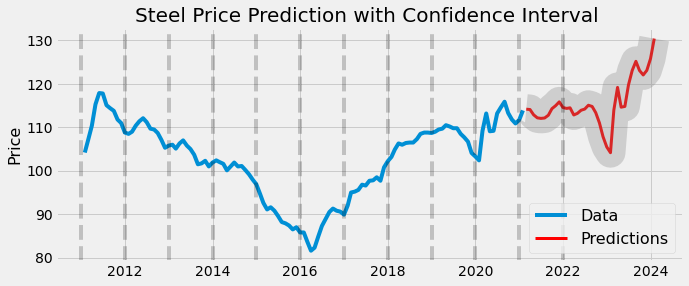

In [50]:
predictions = model_fit.forecast(36)
predictions = pd.Series(predictions)
fig=plt.figure(figsize=(10,4))

plt.plot(copper)
plt.plot(predictions, linewidth="3", label ="Predictions", color="red")


plt.legend(('Data', 'Predictions'), fontsize=16)
plt.plot(predictions, linewidth="30", color="Grey", alpha=0.3)


plt.title('Steel Price Prediction with Confidence Interval ', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
fig.savefig("Steel Price Prediciton with Confidence Interval",dpi=120)